In [1]:
from geodata import Dataset
from geodata.model.wind import WindExtrapolationModel
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-23 23:21:21,553 - geodata - WARNING - Numba not installed. Using pure Python implementation.


In [2]:
dataset = Dataset(
    module="merra2",
    weather_data_config="slv_flux_hourly",
    years=slice(2010, 2010),
    months=slice(1,1)
)

model = WindExtrapolationModel(dataset)
model.prepare()

2023-08-23 23:21:21,558 - geodata.dataset - INFO - Using global bounds.
2023-08-23 23:21:21,559 - geodata.dataset - INFO - Directory /Users/apple/.local/geodata/merra2 found, checking for completeness.
2023-08-23 23:21:21,560 - geodata.dataset - INFO - Directory complete.
2023-08-23 23:21:29,193 - geodata - INFO - The model is already prepared.


In [3]:
speed1 = model.estimate(
    height=2,
    xs=slice(1, 1),
    ys=slice(1, 1),
    years=slice(2010, 2010),
    months=slice(1, 1)
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for

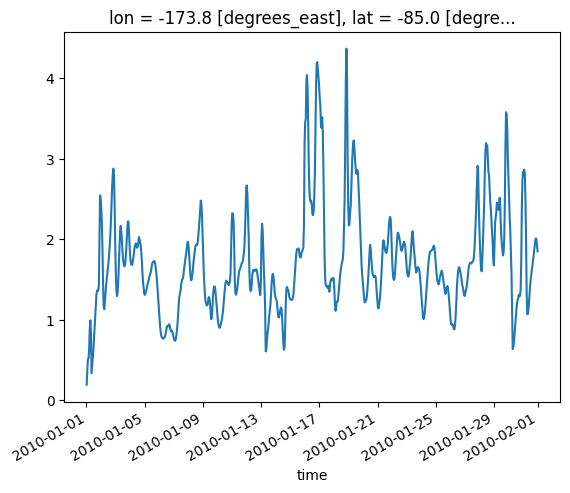

In [4]:
speed1plot = speed1.isel(lat=10, lon=10)
speed1plot.plot();

In [5]:
speed2 = model.estimate(
    height=10,
    xs=slice(1, 1),
    ys=slice(1, 1),
    years=slice(2010, 2010),
    months=slice(1, 1)
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for

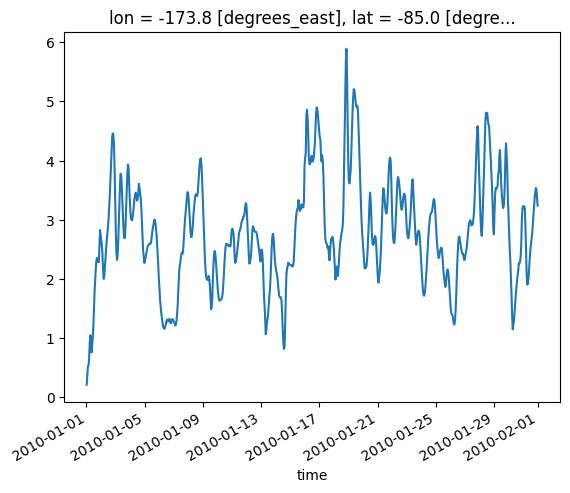

In [6]:
speed2plot = speed2.isel(lat=10, lon=10)
speed2plot.plot();

In [7]:
speed3 = model.estimate(
    height=50,
    xs=slice(1, 1),
    ys=slice(1, 1),
    years=slice(2010, 2010),
    months=slice(1, 1)
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


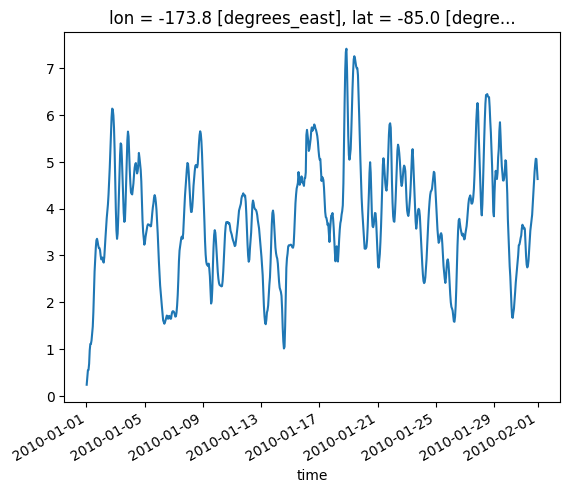

In [8]:
speed3plot = speed3.isel(lat=10, lon=10)
speed3plot.plot();

In [9]:
speed4 = model.estimate(
    height=80, # extrapolation in high heights
    xs=slice(1, 1),
    ys=slice(1, 1),
    years=slice(2010, 2010),
    months=slice(1, 1)
)

2/5/10/80, log pattern, actual hub height (no need for model)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


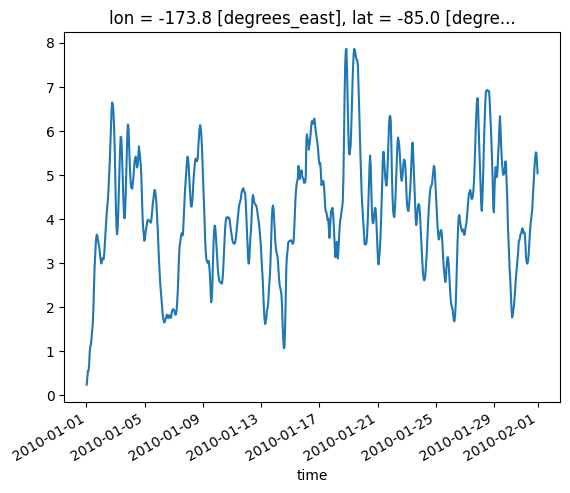

In [10]:
speed4plot = speed4.isel(lat=10, lon=10)
speed4plot.plot();

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5D.c line 465 in H5Dget_create_plist(): unable to get dataset creation properties
    major: Dataset
    minor: Can't get value
  #001: H5VLcallback.c line 2217 in H5VL_dataset_get(): dataset get failed
    major: Virtual Object Layer
    minor: Can't get value
  #002: H5VLcallback.c line 2182 in H5VL__dataset_get(): dataset get failed
    major: Virtual Object Layer
    minor: Can't get value
  #003: H5VLnative_dataset.c line 268 in H5VL__native_dataset_get(): can't get creation property list for dataset
    major: Invalid arguments to routine
    minor: Can't get value
  #004: H5Dint.c line 3686 in H5D_get_create_plist(): datatype conversion failed
    major: Dataset
    minor: Can't convert datatypes
  #005: H5T.c line 544

RuntimeError: NetCDF: HDF error

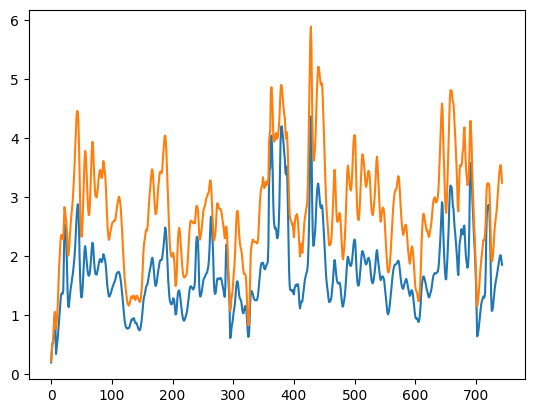

In [11]:
plt.plot(speed1plot, label='H = 2');
plt.plot(speed2plot, label='H = 10');
plt.plot(speed3plot, label='H = 50');
plt.plot(speed4plot, label='H = 80');
plt.show()